# Serpinski #
**Draw a Serpinski triangle by generating random numbers**

We can generate a Serpinski triangle by carrying out the following algorithm:

1. Define the corners of a triangle in the $(x,y)$ plane

2. Choose a starting point arbitrarily (for us we'll choose one of the corners, which we know is actually a point on the triangle)

3. Randomly choose a corner to move toward

4. Move halfway from the starting point to the chosen corner. That is the new starting point

5. Repeat steps 3 and 4 until the desired number of points have been placed


__Partial explanation for why this works:__

The Serpinski triangle is a self-including fractal - each of the three similar triangles inside the largest triangle are perfect copies of the fractal as a whole. 

When we carry out this algorithm, each corner has a one-third chance of being chosen, meaning we have one-third chance to travel into each corner. Once we're in that corner, the process of drawing is identical to the process of drawing the fractal as a whole, except it's reduced to the third of cases where we're already in that corner. 

In other words, the process of drawing one-third of the shape is identical to the process of drawing the shape as a whole, just reduced by one-third of the points - which is exactly the same self-inclusion as the Serpinski triangle.

The actual explanation is complicated by the fact that when you're inside one of the smaller triangles, you don't actually travel halfway to the 'inner' corners (which would be the halfway points of the sides of the larger triangle), but travelling halfway to an 'inner' corner is the same as travelling from the smaller triangle into another triangle, and then halfway back.

In [24]:
# imports
import numpy as np # numpy - for all your math and array needs
import matplotlib.pyplot as plt # the essentials for plotting

In [25]:
# constants 

# numpy.random.Generator object for generating random numbers
rng = np.random.default_rng()

# number of points in drawing
N = 10_000

In [ ]:
# define corner positions of outer triangle

# angles (in radians)
corner_angles = np.array([0, 2*np.pi/3, 4*np.pi/3])
# could also use the following equivalent definitions:
# using arange: start,stop,step
#   corner_angles = np.arange(0, 2*np.pi, 2*np.pi/3)
#   corner_angles = np.arange(3)*2*np.pi/3 (scale [0,1,2] by 2pi/3)
# using linspace: start,stop,numsteps
#   corner_angles = np.linspace(0, 4*np.pi/3, 3) 
#   corner_angles = np.linspace(0, 2*np.pi, 3, endpoint = False)

# get x and y coords from angles
x_corners = np.cos(corner_angles)
y_corners = np.sin(corner_angles)

In [ ]:
# generate points

choices = rng.integers(3, size = N) # random integers from 0,1,2 (to choose which corner to move toward)

# array to store positions of points
dots = np.zeros((N,2))
# we could also use a list and append points as we go, but usually if we know how many points we want ahead of time, it's preferable to allocate the storage space at the beginning
# dots[i,0] means the x-coordinate of position i, dots[i,1] the y-coordinate

# initial point: one of the corners
dots[0,0] = x_corners[choices[0]]
dots[0,1] = y_corners[choices[0]]

# loop through choices to tell us where to step
for i, c in enumerate(choices[1:]):
    # this line is equivalent to either of the following:
    # for i in range(len(choices)-1):
    #     c = choices[i+1]
    # or
    # for i,c in zip(range(len(choices)-1), choices[1:]):

    # assign x and y components of new position
    dots[i+1,0] = (x_corners[c] + dots[i,0])/2
    dots[i+1,1] = (y_corners[c] + dots[i,1])/2

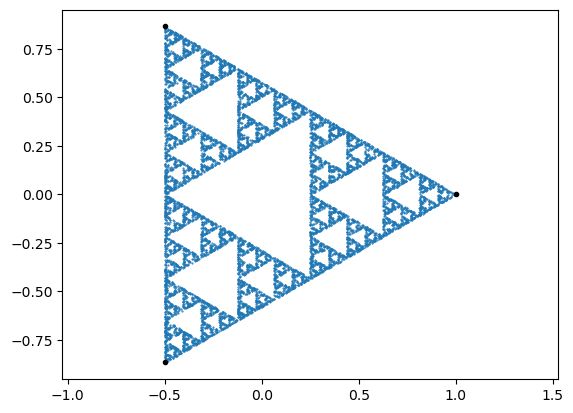

In [29]:
plt.figure()
plt.axis('equal')

#plt.grid()

plt.plot(dots[:,0], dots[:,1], '.', markersize = 1, alpha = 1)
plt.plot(x_corners, y_corners, 'k.')

Now that we've created a Serpinski triangle, what else can we do?

- How can we rotate the triangle so that it stands up straight?

- Does the triangle have to be equilateral? Can we try any set of three points?

- Can we create similar fractals with other shapes as starting points?

- Are there more efficient ways to program the stepping procedures? Can we use two-dimensional arrays? 

- Is there a way to code this process using complex numbers instead of arrays (`1` and `1j` instead of `[1,0]` and `[0,1]`)?

- Can we animate the process of drawing using [`matplotlib.animation.FuncAnimation`](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html)?
